In [1]:

import Model as model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
one_input =[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]
two_inputs = [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]
spread_inputs = [1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0]

## Uncomment below for a random vector
#input_len = 100
#density = .1
#one_input = model.generate_input_vector(input_len,density) ## (number of elements in vector, density of vector)
#two_inputs = model.generate_input_vector(input_len,density) ## (number of elements in vector, density of vector)
#spread_inputs = model.generate_input_vector(input_len,density) ## (number of elements in vector, density of vector)

all_inputs = [one_input,two_inputs,spread_inputs]


In [3]:

## Model parameters
omega = 1             ## Width of the neural responses
T = 10                  ## Time T parameter (bays eqn 4)
gain_gamma = 10         ## gain parameter Gamma (eqn 2).

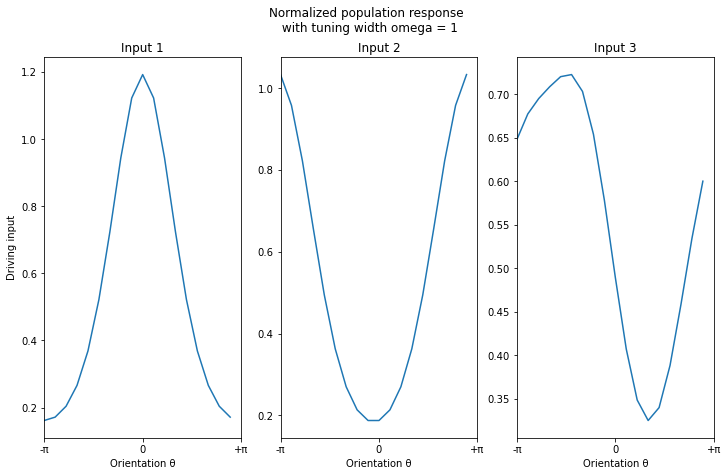

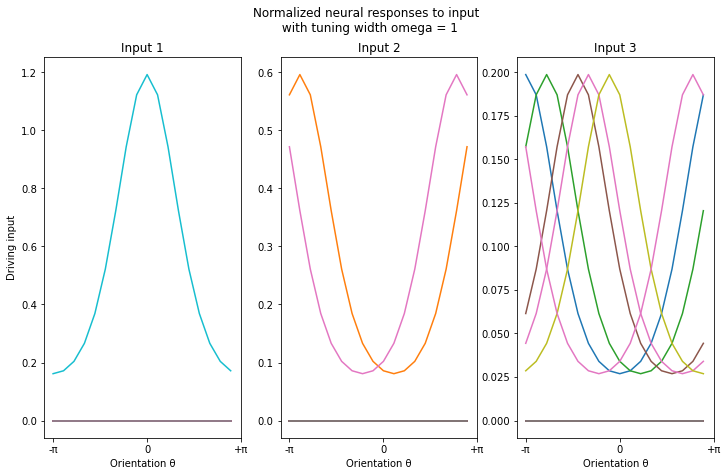

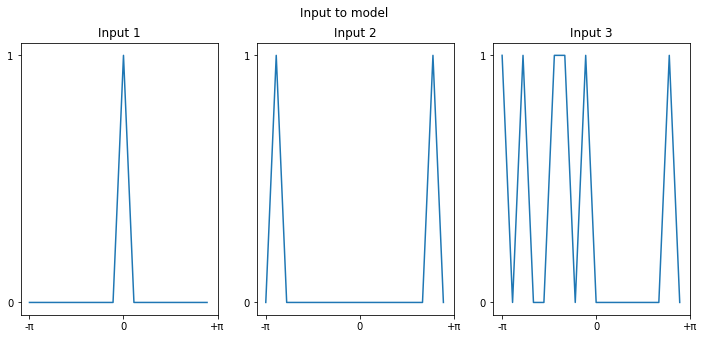

In [4]:

Test_layer_one_input = model.Sensory_Layer(number_of_neurons=len(one_input),omega = omega)
Test_layer_two_inputs = model.Sensory_Layer(number_of_neurons=len(two_inputs),omega = omega)
Test_layer_spread_inputs = model.Sensory_Layer(number_of_neurons=len(spread_inputs),omega = omega)
layers = [Test_layer_one_input,Test_layer_two_inputs,Test_layer_spread_inputs]
output = []
for i in range (0,len(layers)):
    ### This is the f_ij matrix
    unnormalized_response_matrix = layers[i].generate_output(all_inputs[i],plot=False,set_normalized_matrix=False,normalize=False)
    population_response_unormalized = layers[i].population_response(unnormalized_response_matrix)

    ### This is the r_ij matrix
    normalized_response_matrix = layers[i].generate_output(all_inputs[i],plot=False,set_normalized_matrix=True,normalize=True,gain_gamma=gain_gamma)
    population_response_normalized = layers[i].population_response(normalized_response_matrix)

    out = [unnormalized_response_matrix,population_response_unormalized,normalized_response_matrix,population_response_normalized]
    output.append(out)



fig, axs = plt.subplots(1, 3,figsize=(12,7))
fig.suptitle("Normalized population response \n with tuning width omega = "+str(omega))
axs[0].set_ylabel("Driving input")
for i in range(0,3):
    axs[i].plot(output[i][3])
    axs[i].set_title("Input "+ str(i+1))
    axs[i].set_xlim(0,len(all_inputs[i]))
    axs[i].set_xlabel("Orientation θ")
    axs[i].set_xticks([0,int(len(all_inputs[i])/2),len(all_inputs[i])])
    axs[i].set_xticklabels(["-π",0,"+π"])

fig, axs = plt.subplots(1, 3,figsize=(12,7))
fig.suptitle("Normalized neural responses to input \n with tuning width omega = "+str(omega))
axs[0].set_ylabel("Driving input")
for i in range(0,3):
    axs[i].plot(output[i][2])
    axs[i].set_title("Input "+str(i+1))
    axs[i].set_xlabel("Orientation θ")
    axs[i].set_xticks([0,int(len(all_inputs[i])/2),len(all_inputs[i])])
    axs[i].set_xticklabels(["-π",0,"+π"])

fig, axs = plt.subplots(1, 3,figsize=(12,5))
fig.suptitle("Input to model")
for i in range(0,3):
    axs[i].plot(all_inputs[i])
    axs[i].set_title("Input "+ str(i+1))
    axs[i].set_yticks([0,1])
    axs[i].set_xticks([0,int(len(all_inputs[i])/2),len(all_inputs[i])])
    axs[i].set_xticklabels(["-π",0,"+π"])




In [5]:
N = []
for i in range(0,len(all_inputs)):
    probability_matrix = layers[i].return_spiking_distribution(output[i][2],T=T,plot=False)
    N.append(probability_matrix)

In [6]:
## This cell checks to see if the information from the input 
## was retained in the probability matrix N (equation 4)
## used mainly for debugging

##Test_layer.percent_similarity(input,N)


In [7]:
for i in range(0,len(all_inputs)):  
    print("INPUT "+str(i+1))  
    print("Maximum likelihood estimation: "+str(layers[i].maximum_liklihood(N[i],output[i][0])))
    print("Population response argmax: "+ str(np.argmax(output[i][1])))
    print("Cosine maximum liklihood estimation: "+str(layers[i].maximum_liklihood_cos(N[i])))
    print("")




INPUT 1
Maximum likelihood estimation: 9
Population response argmax: 9
Cosine maximum liklihood estimation: 5

INPUT 2
Maximum likelihood estimation: 17
Population response argmax: 17
Cosine maximum liklihood estimation: 15

INPUT 3
Maximum likelihood estimation: 3
Population response argmax: 5
Cosine maximum liklihood estimation: 3



In [8]:

for i in range(0,len(all_inputs)):  
    print("INPUT "+str(i+1))  
    print("Maximum likelihood estimation theta: "+str(2*np.pi/len(all_inputs[i])*layers[i].maximum_liklihood(N[i],output[i][0])-np.pi))
    print("Population response argmax theta: "+ str(2*np.pi/len(all_inputs[i])*np.argmax(output[i][1])-np.pi))
    print("Cosine maximum liklihood estimation theta: "+str(2/len(all_inputs[i])*np.pi*layers[i].maximum_liklihood_cos(N[i])-np.pi))
    print("")

INPUT 1
Maximum likelihood estimation theta: 0.0
Population response argmax theta: 0.0
Cosine maximum liklihood estimation theta: -1.3962634015954636

INPUT 2
Maximum likelihood estimation theta: 2.7925268031909267
Population response argmax theta: 2.7925268031909267
Cosine maximum liklihood estimation theta: 2.0943951023931957

INPUT 3
Maximum likelihood estimation theta: -2.0943951023931957
Population response argmax theta: -1.3962634015954636
Cosine maximum liklihood estimation theta: -2.0943951023931957

